In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('using dataset/housing.csv')
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


# Set column name

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df= pd.read_csv('using dataset/housing.csv', header=None,  delimiter=r"\s+",names=column_names)
# Set column name
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Missing value find

In [6]:
df['CRIM'].isna().sum(), df['ZN'].isna().sum(), df['INDUS'].isna().sum(), df['CHAS'].isna().sum(), df['NOX'].isna().sum(), df['RM'].isna().sum(), df['AGE'].isna().sum(), df['DIS'].isna().sum(), df['RAD'].isna().sum(), df['TAX'].isna().sum(), df['PTRATIO'].isna().sum(), df['B'].isna().sum(), df['LSTAT'].isna().sum(), df['MEDV'].isna().sum()

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Visualize the distribution of the target variable (MEDV - Median value of homes)

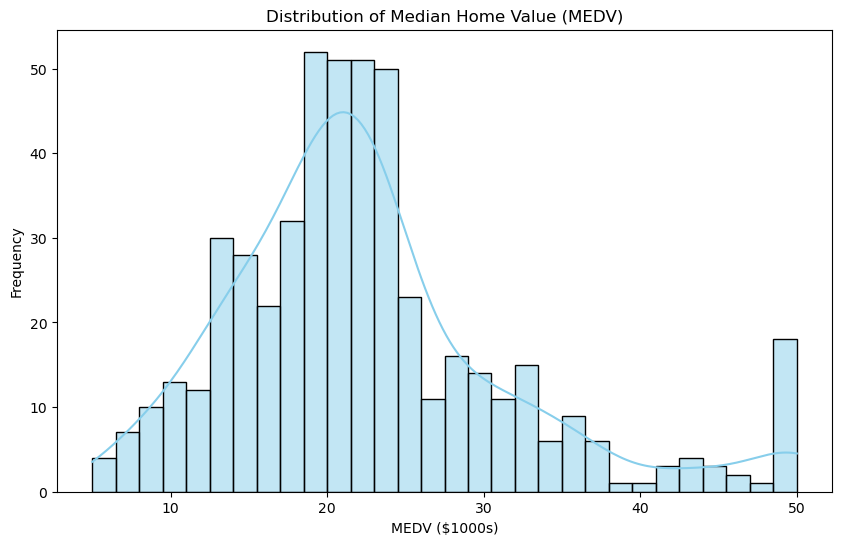

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Median Home Value (MEDV)')
plt.xlabel('MEDV ($1000s)')
plt.ylabel('Frequency')
plt.show()

# outlayer


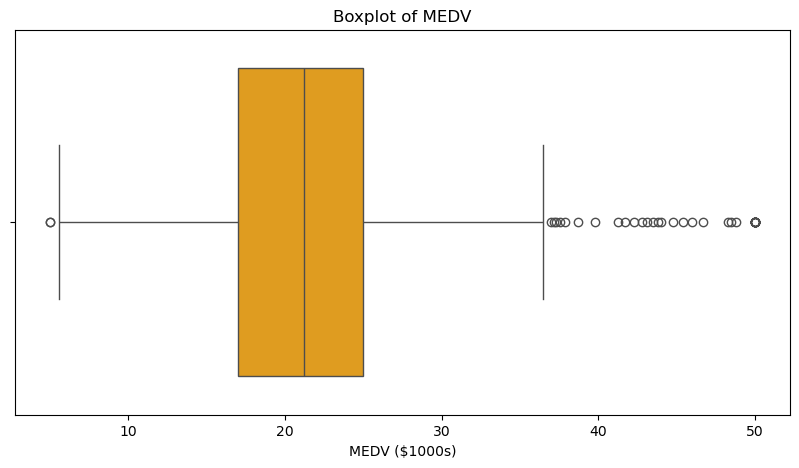

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['MEDV'], color='orange')
plt.title('Boxplot of MEDV')
plt.xlabel('MEDV ($1000s)')
plt.show()

In [9]:
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['MEDV'] < lower_bound) | (df['MEDV'] > upper_bound)]

print("Number of outliers:", len(outliers))
print(outliers[['MEDV']])


Number of outliers: 40
     MEDV
97   38.7
98   43.8
157  41.3
161  50.0
162  50.0
163  50.0
166  50.0
179  37.2
180  39.8
182  37.9
186  50.0
190  37.0
195  50.0
202  42.3
203  48.5
204  50.0
224  44.8
225  50.0
226  37.6
228  46.7
232  41.7
233  48.3
253  42.8
256  44.0
257  50.0
261  43.1
262  48.8
267  50.0
268  43.5
280  45.4
282  46.0
283  50.0
291  37.3
368  50.0
369  50.0
370  50.0
371  50.0
372  50.0
398   5.0
405   5.0


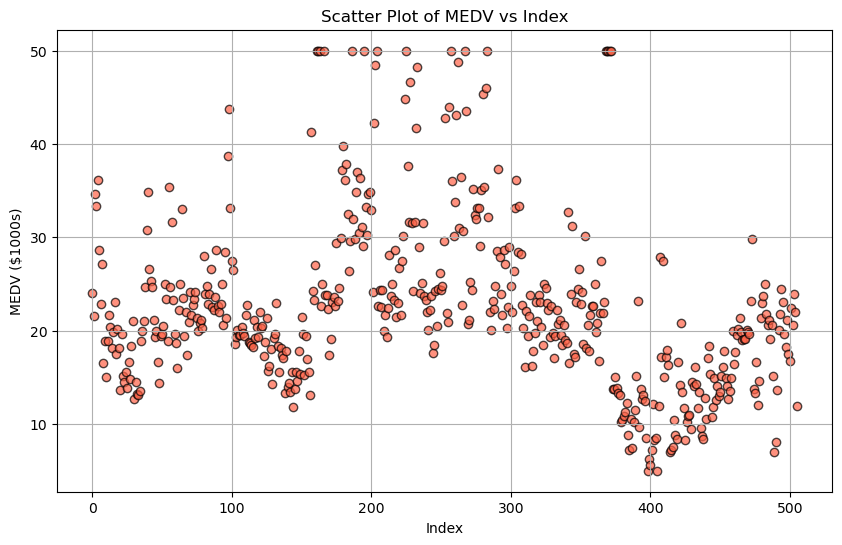

In [10]:


# Plot MEDV (column 13) vs index
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['MEDV'], alpha=0.7, color='tomato', edgecolor='k')
plt.title('Scatter Plot of MEDV vs Index')
plt.xlabel('Index')
plt.ylabel('MEDV ($1000s)')
plt.grid(True)
plt.show()


# Remove outliers

In [11]:
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['MEDV'] >= lower_bound) & (df['MEDV'] <= upper_bound)]


# Again check outliers

In [12]:
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['MEDV'] < lower_bound) | (df['MEDV'] > upper_bound)]

print("Number of outliers:", len(outliers))
print(outliers[['MEDV']])

Number of outliers: 6
     MEDV
4    36.2
181  36.2
192  36.4
258  36.0
264  36.5
304  36.1


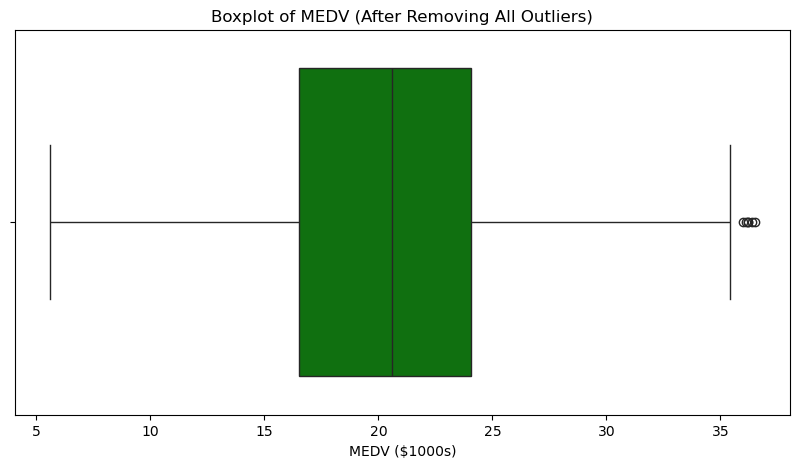

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['MEDV'], color='green')
plt.title('Boxplot of MEDV (After Removing All Outliers)')
plt.xlabel('MEDV ($1000s)')
plt.show()


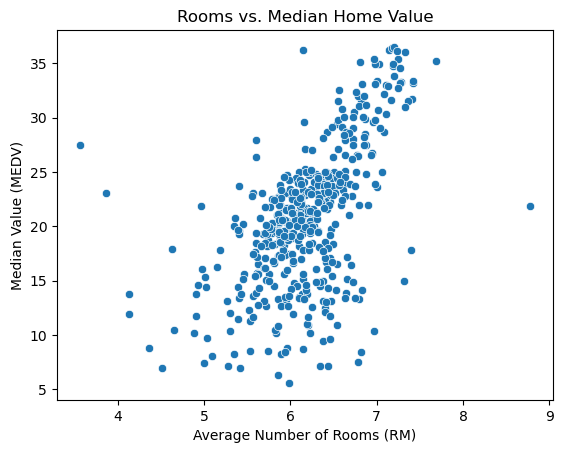

In [14]:
sns.scatterplot(x=df['RM'], y=df['MEDV'])
plt.title('Rooms vs. Median Home Value')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value (MEDV)')
plt.show()

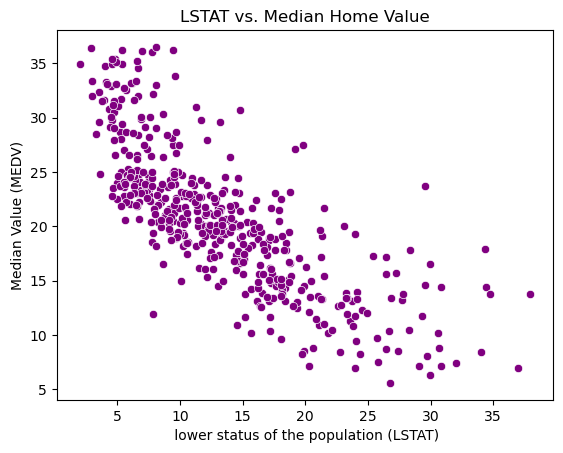

In [15]:
sns.scatterplot(x=df['LSTAT'], y=df['MEDV'], color='purple',markers='s')
plt.title('LSTAT vs. Median Home Value')
plt.xlabel(' lower status of the population (LSTAT)')
plt.ylabel('Median Value (MEDV)')
plt.show()

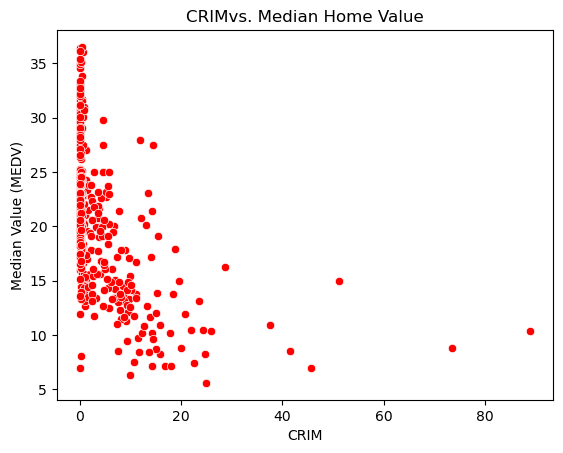

In [16]:
sns.scatterplot(x=df['CRIM'], y=df['MEDV'], color='red',markers='+')
plt.title('CRIMvs. Median Home Value')
plt.xlabel('CRIM')
plt.ylabel('Median Value (MEDV)')
plt.show()

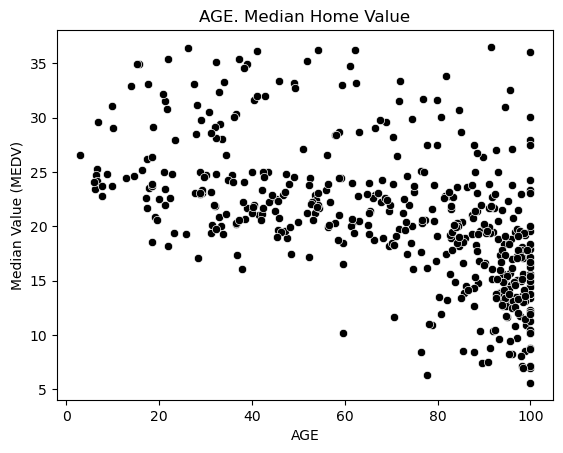

In [17]:
sns.scatterplot(x=df['AGE'], y=df['MEDV'], color='black',markers='s')
plt.title('AGE. Median Home Value')
plt.xlabel('AGE')
plt.ylabel('Median Value (MEDV)')
plt.show()

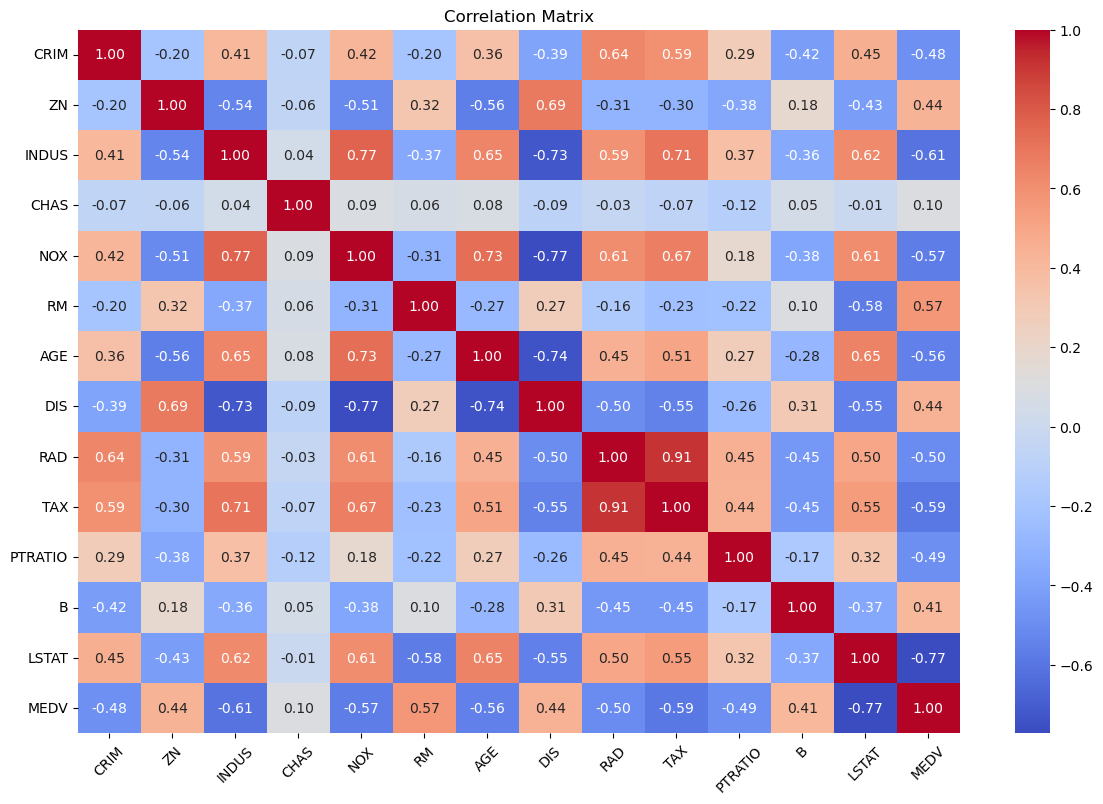

In [18]:

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.title('Correlation Matrix')
plt.show()


# Data Splitting:

In [19]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('MEDV', axis=1)  # All columns except the target
y = df['MEDV']               # Target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (326, 13)
Test set size: (140, 13)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MSE: 10.528354438447108
R² Score: 0.7196566386100659


# Random Forest Regressor 

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np
n = X_test.shape[0]
k = X_test.shape[1]

rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))

print("MAE:", round(mae, 2))
print(f"Mean Squared Error (MSE): {mse:.2f}")
print("RMSE:", round(rmse, 2))
print(f"R² Score: {r2:.2f}")
print("Adjusted R²:", round(adjusted_r2, 2))

MAE: 1.91
Mean Squared Error (MSE): 7.24
RMSE: 2.69
R² Score: 0.81
Adjusted R²: 0.79


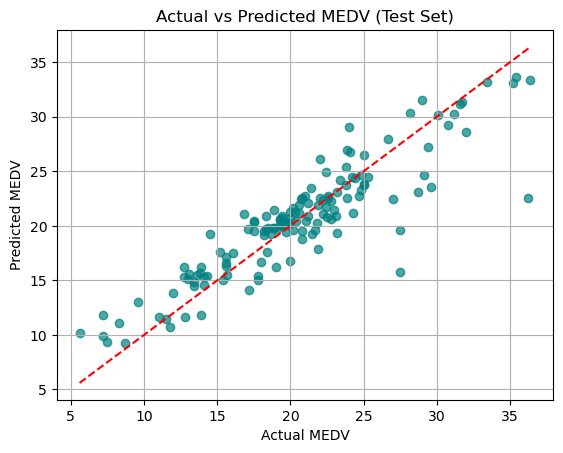

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.grid()
plt.show()
